In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv(r'/Users/aceboogie/Desktop/medical_clean.csv')

# Remove duplicates
df = df.drop_duplicates()

# Drop irrelevant columns for the research question
columns_to_drop = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job']
df = df.drop(columns=columns_to_drop)

# Standardize categorical variables
df['Area'] = df['Area'].str.lower()
df['Marital'] = df['Marital'].str.lower()
df['Gender'] = df['Gender'].str.lower()
df['ReAdmis'] = df['ReAdmis'].str.lower()
df['Soft_drink'] = df['Soft_drink'].str.lower()
df['Initial_admin'] = df['Initial_admin'].str.lower()
df['Services'] = df['Services'].str.lower()

# One-hot encode categorical variables
categorical_columns = ['Area', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 'Services']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Save the cleaned data to a new CSV file
df.to_csv('cleaned_medical_data_for_linear.csv', index=False)


In [ ]:
# Read the cleaned dataset
df = pd.read_csv(r'/Users/aceboogie/Desktop/cleaned_medical_data_for_linear.csv')

# Obtain summary statistics
summary_statistics = df.describe()

# Save summary statistics to a CSV file
#summary_statistics.to_csv('summary_statistics.csv')

In [ ]:
summary_statistics

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,...,Marital_widowed,Gender_male,Gender_nonbinary,ReAdmis_yes,Soft_drink_yes,Initial_admin_emergency admission,Initial_admin_observation admission,Services_ct scan,Services_intravenous,Services_mri
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,0.398900,34.455299,5312.172769,...,0.204500,0.476800,0.021400,0.366900,0.257500,0.506000,0.243600,0.122500,0.313000,0.038000
std,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,0.628505,26.309341,2180.393838,...,0.403356,0.499486,0.144721,0.481983,0.437279,0.499989,0.429276,0.327879,0.463738,0.191206
min,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,0.000000,7.896215,3179.374015,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,0.000000,35.836244,5213.952000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,1.000000,61.161020,7459.699750,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/var/folders/7h/d1wz9q2901z6f4x7gmz0vxtm0000gn/T/ipykernel_32216/2093791241.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


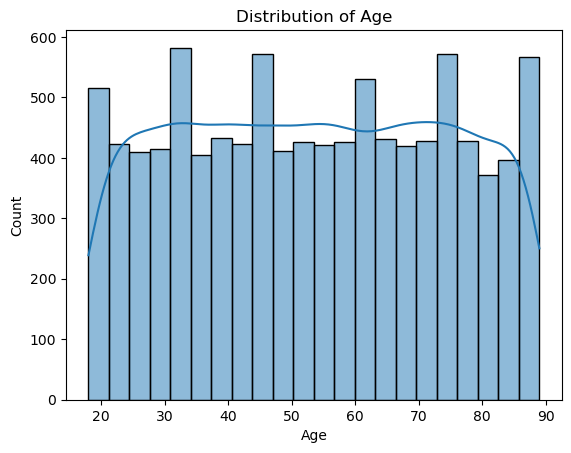

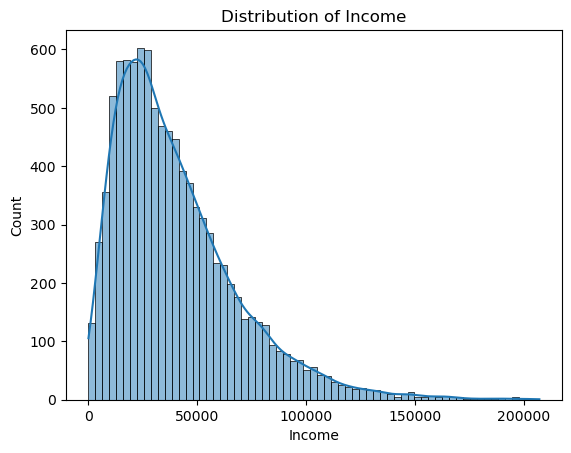

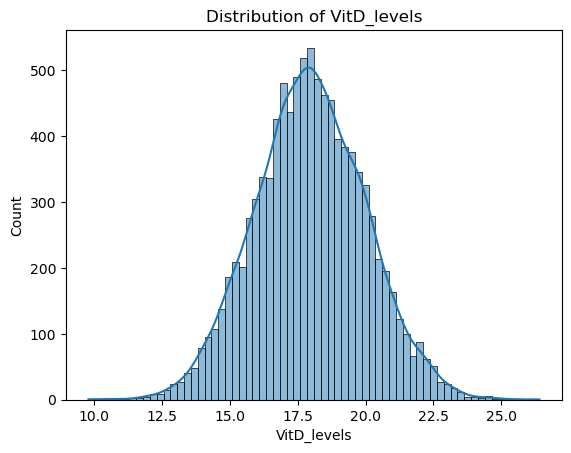

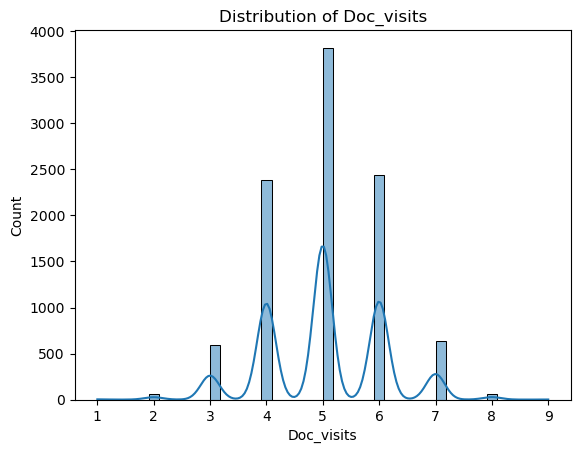

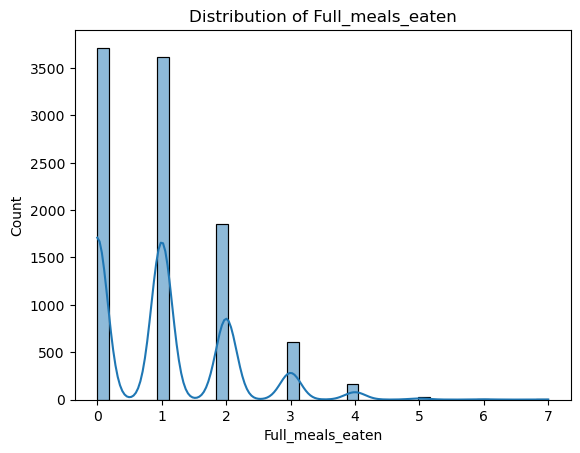

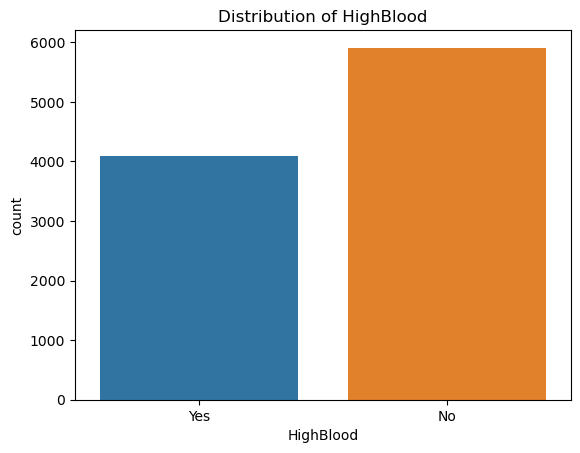

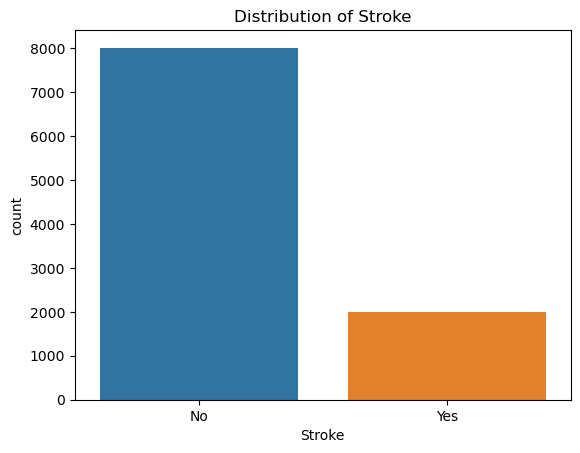

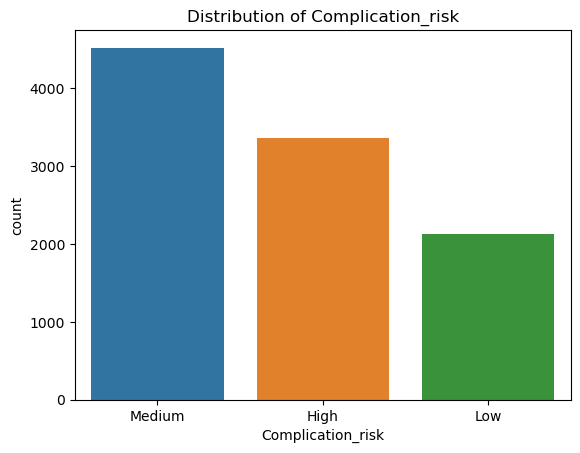

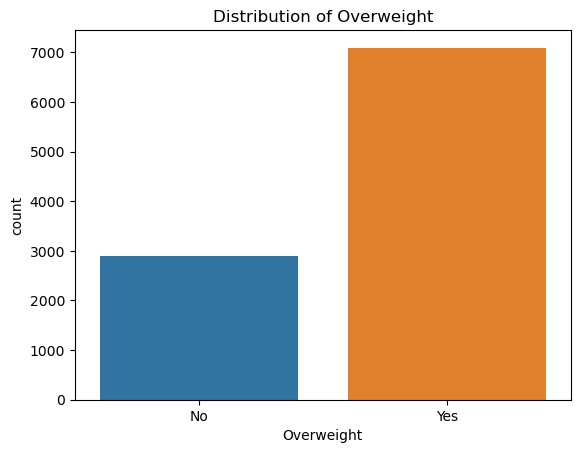

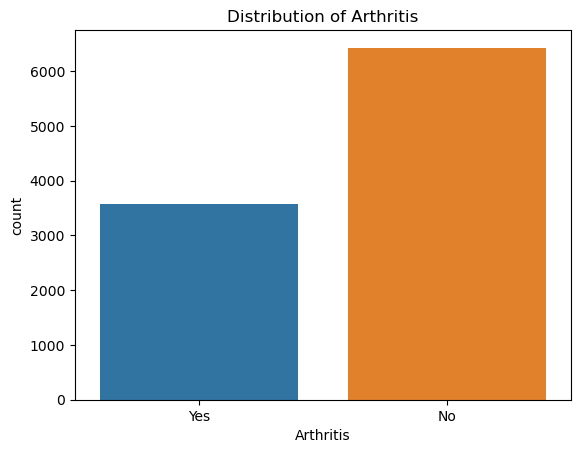

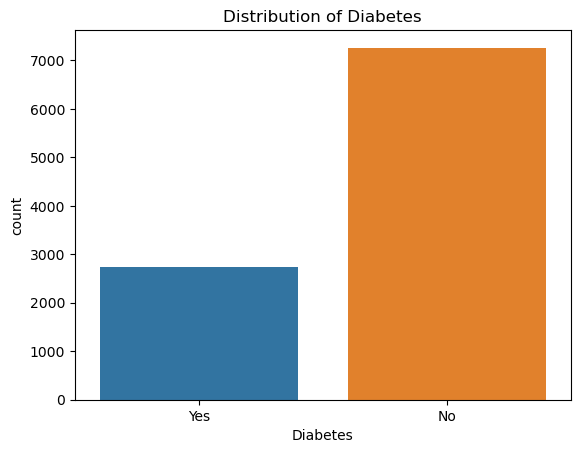

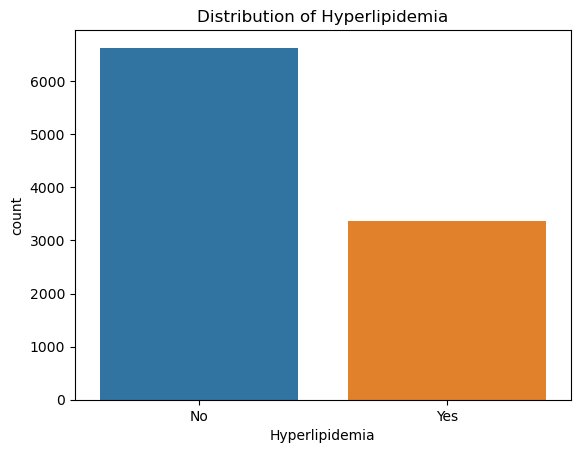

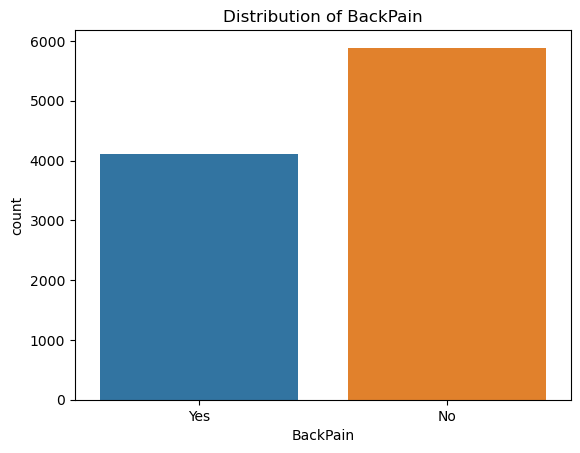

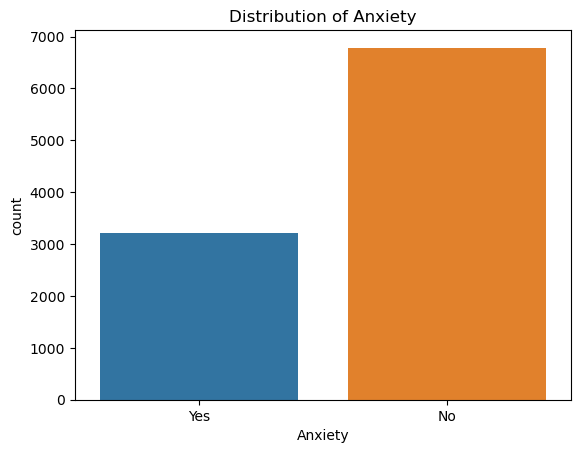

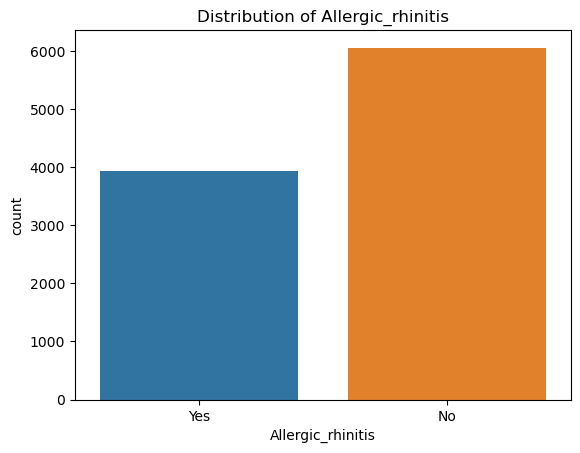

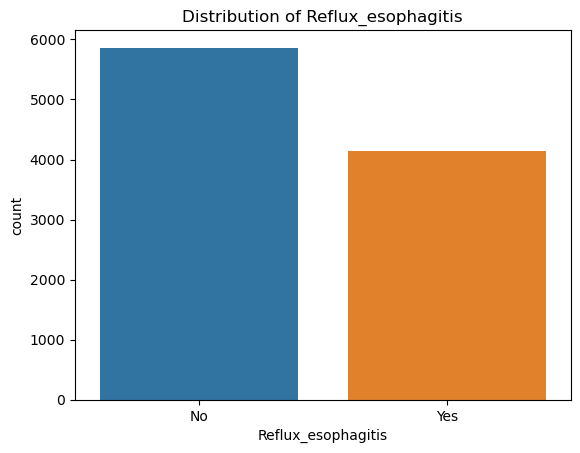

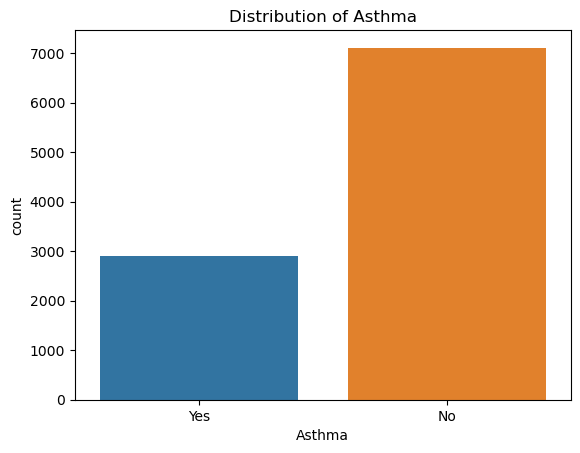

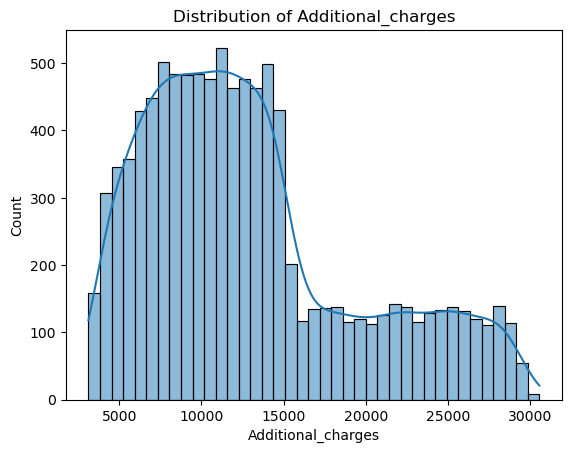

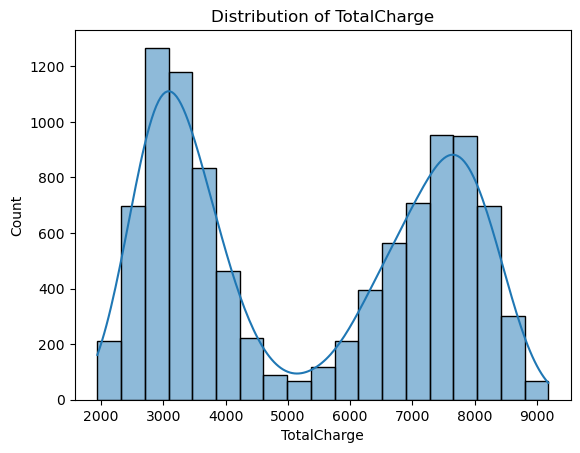

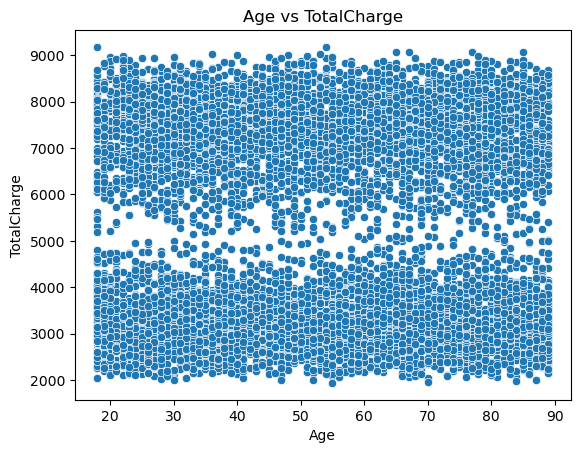

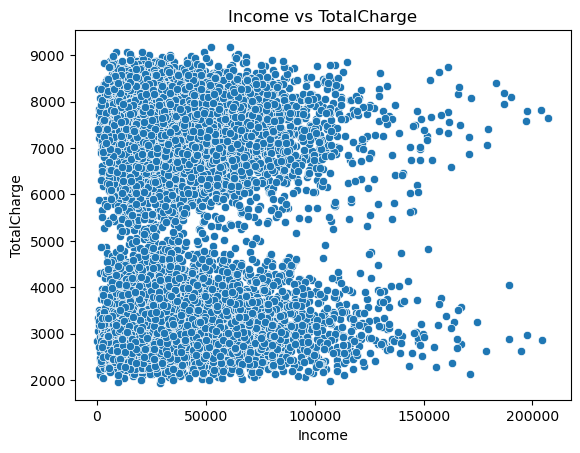

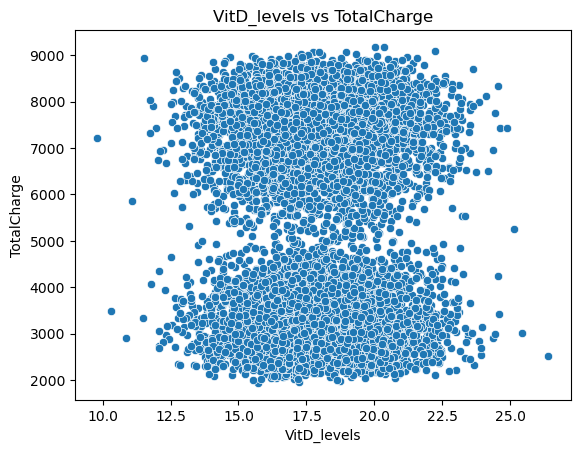

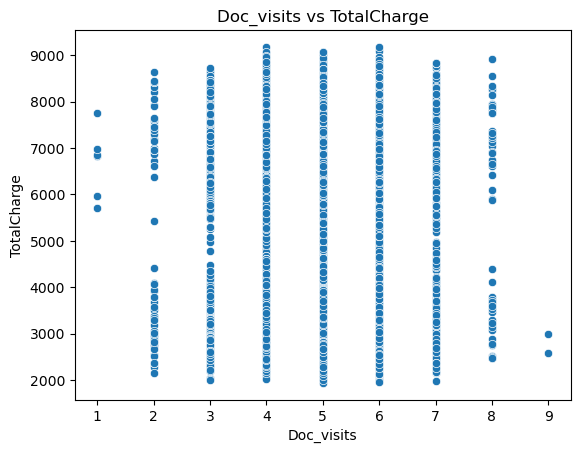

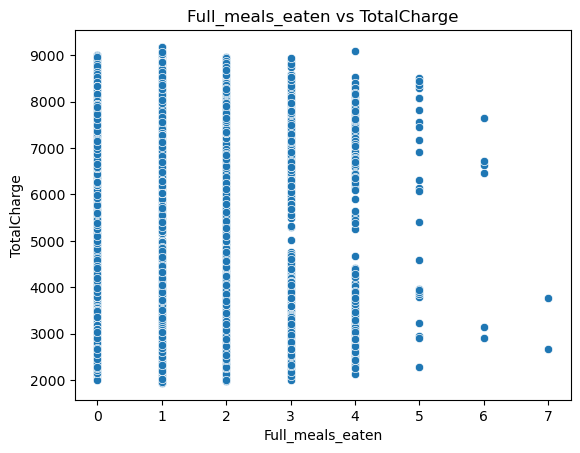

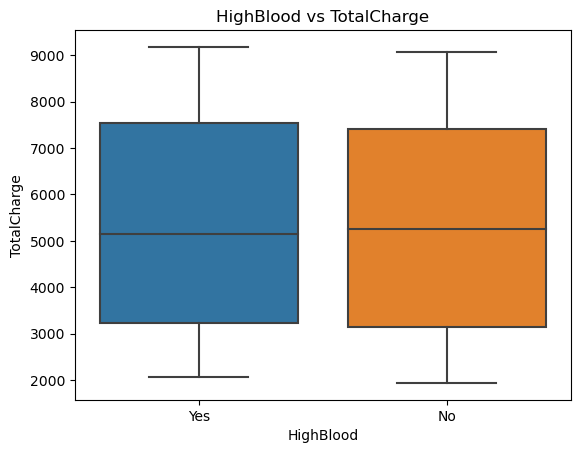

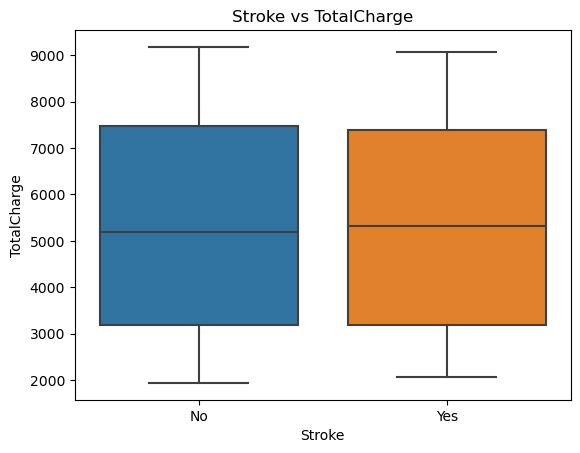

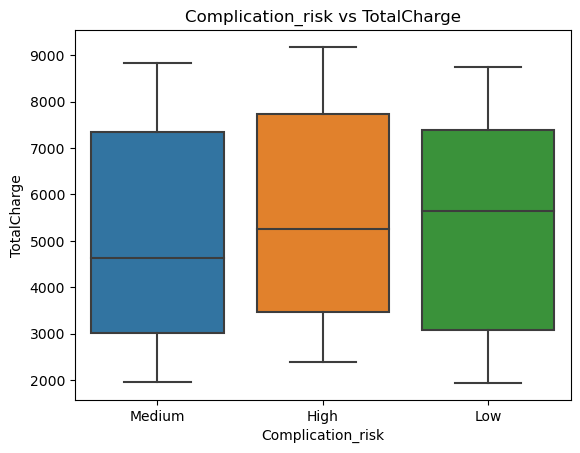

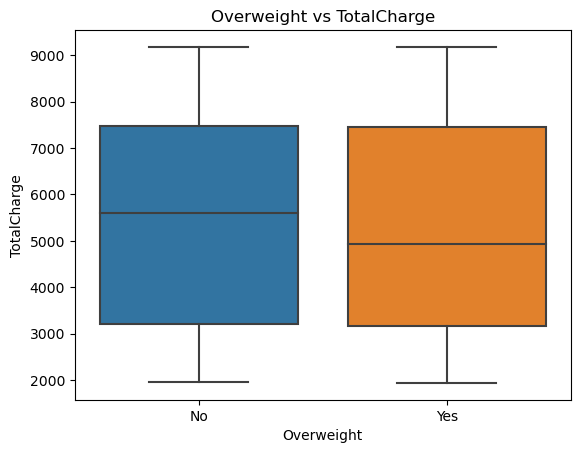

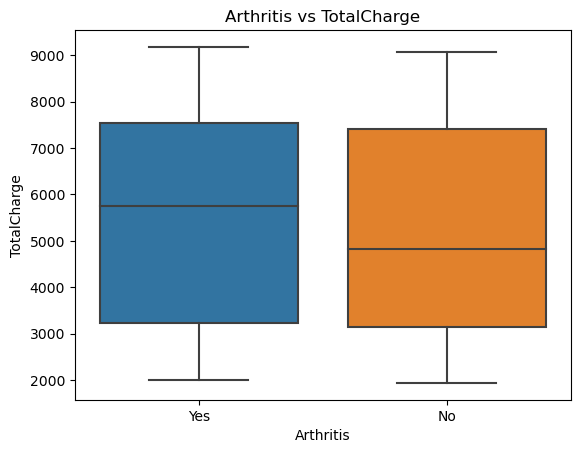

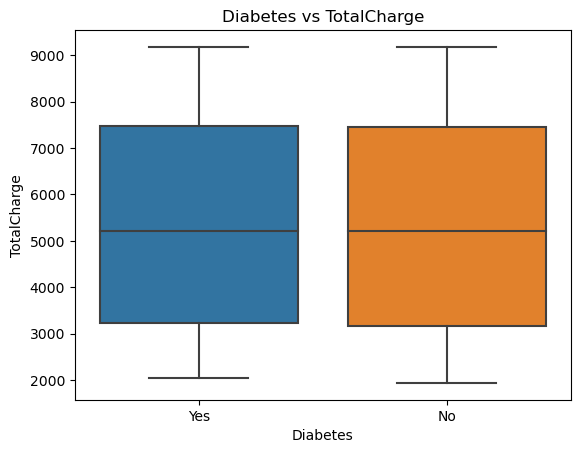

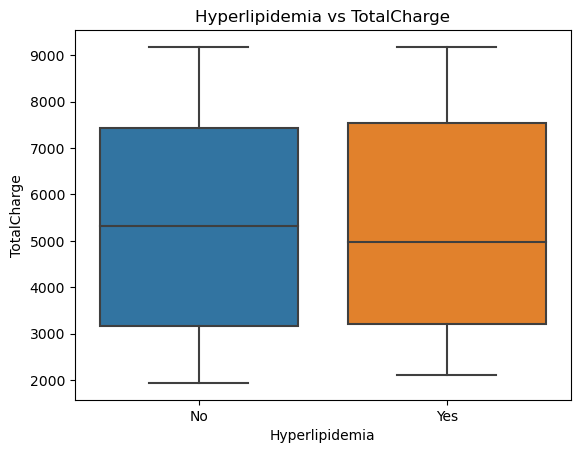

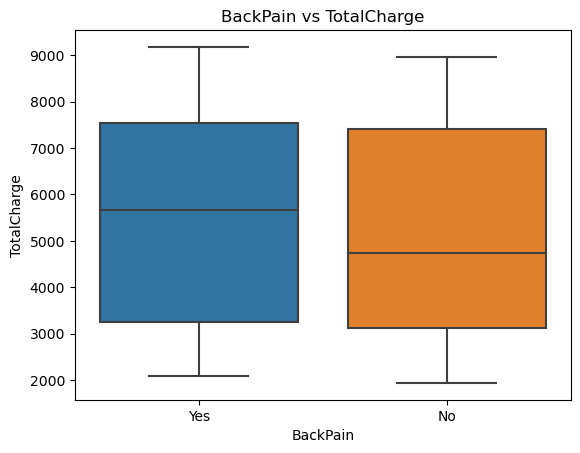

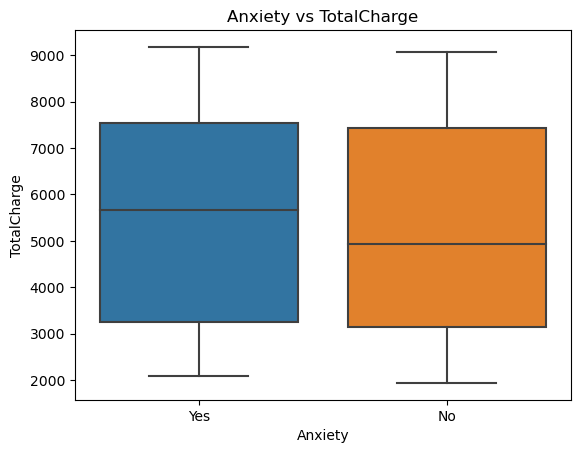

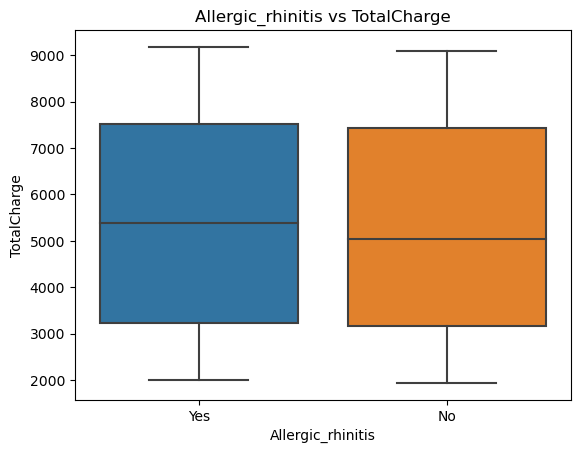

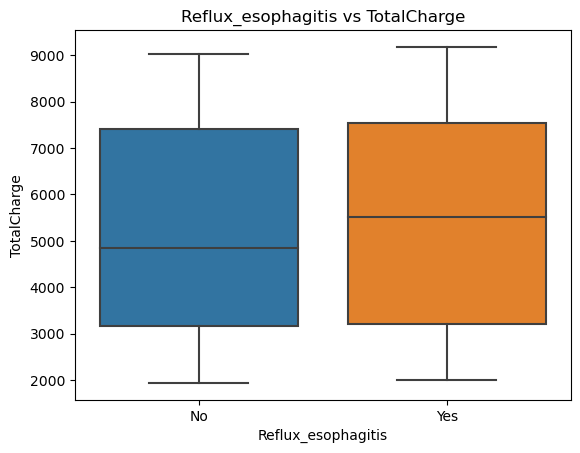

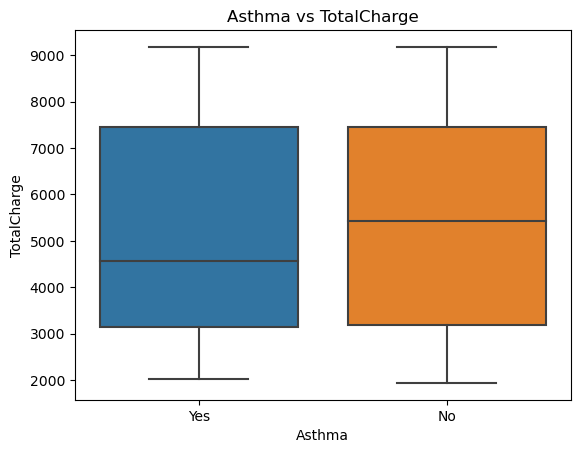

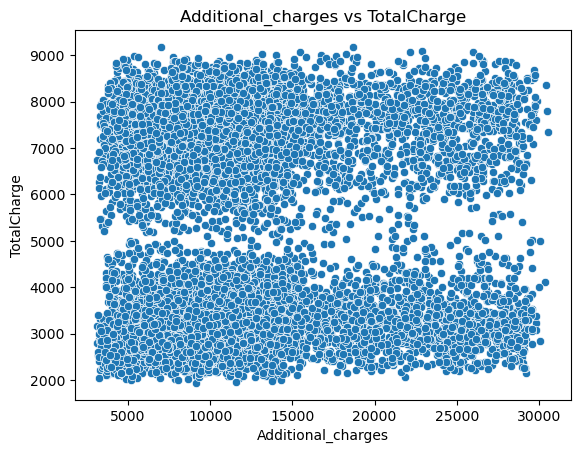

In [15]:
# List of potential predictor variables
potential_predictors = ['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'HighBlood', 'Stroke',
                        'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
                        'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Additional_charges']

dependent_variable = 'TotalCharge'

# Univariate visualizations for potential predictors
for variable in potential_predictors:
    plt.figure()
    if df[variable].dtype == 'object':  # Categorical variables
        sns.countplot(x=variable, data=df)
    else:  # Numerical variables
        sns.histplot(x=variable, data=df, kde=True)
    plt.title(f'Distribution of {variable}')
    plt.savefig(f'univariate_{variable}.png')

# Univariate visualization for the dependent variable
plt.figure()
sns.histplot(x=dependent_variable, data=df, kde=True)
plt.title(f'Distribution of {dependent_variable}')
plt.savefig(f'univariate_{dependent_variable}.png')

# Bivariate visualizations between potential predictors and the dependent variable
for variable in potential_predictors:
    plt.figure()
    if df[variable].dtype == 'object':  # Categorical variables
        sns.boxplot(x=variable, y=dependent_variable, data=df)
    else:  # Numerical variables
        sns.scatterplot(x=variable, y=dependent_variable, data=df)
    plt.title(f'{variable} vs {dependent_variable}')
    plt.savefig(f'bivariate_{variable}_vs_{dependent_variable}.png')

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# Read the cleaned dataset
df = pd.read_csv(r'/Users/aceboogie/Desktop/medical_clean.csv')

# Goal 1: Convert categorical variables into numerical variables using one-hot encoding
categorical_columns = ['Area', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 'Services']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Goal 2: Scale numerical variables to ensure they have similar ranges
numerical_columns = ['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
                     'Full_meals_eaten', 'Initial_days', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
                     'Item5', 'Item6', 'Item7', 'Item8']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Goal 3: Handle missing values, if any
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Save the transformed dataset
df.to_csv('transformed_medical_data.csv', index=False)

In [38]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the transformed dataset
df = pd.read_csv(r'/Users/aceboogie/Desktop/cleaned_medical_data_for_linear.csv')

# One-hot encode categorical variables
categorical_columns = ['HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define independent and dependent variables
X = df.drop('TotalCharge', axis=1)
y = df['TotalCharge']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a multiple linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict values for the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

RMSE: 0.00
R^2: 1.00


In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

# Load the transformed dataset
df = pd.read_csv(r'/Users/aceboogie/Desktop/cleaned_medical_data_for_linear.csv')

# One-hot encode categorical variables
categorical_columns = ['HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define independent and dependent variables
X = df.drop('TotalCharge', axis=1)
y = df['TotalCharge']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a multiple linear regression model
model = LinearRegression()

# Create an RFE object with the desired number of features
n_features = 10
rfe = RFE(estimator=model, n_features_to_select=n_features)

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_columns = X_train.columns[rfe.support_]

# Fit the model with the selected features
model.fit(X_train[selected_columns], y_train)

# Predict values for the testing set
y_pred = model.predict(X_test[selected_columns])

# Evaluate the model's performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Selected features: {selected_columns.tolist()}')
print(f'RMSE: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]
model_reduced = LinearRegression()
model_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = model_reduced.predict(X_test_reduced)
rmse_reduced = np.sqrt(mean_squared_error(y_test, y_pred_reduced))
r2_reduced = r2_score(y_test, y_pred_reduced)
print('Reduced Linear Regression Model')
print('Selected Features:', selected_features)
print('RMSE:', rmse_reduced)
print('R^2:', r2_reduced)
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the residuals
residuals = y_test - y_pred

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the residual standard error (RSE)
rse = np.sqrt(mse)

print(f'Residual Standard Error: {rse:.2f}')

Selected features: ['Initial_days', 'Initial_admin_emergency admission', 'HighBlood_Yes', 'Complication_risk_Low', 'Complication_risk_Medium', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes']
RMSE: 41.06
R^2: 1.00
Reduced Linear Regression Model
Selected Features: Index(['Initial_days', 'Initial_admin_emergency admission', 'HighBlood_Yes',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Arthritis_Yes',
       'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes'],
      dtype='object')
RMSE: 41.06005789995828
R^2: 0.9996480111350218
Residual Standard Error: 41.06


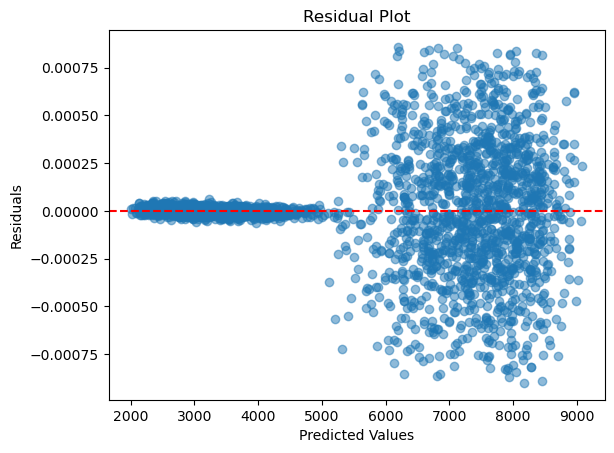

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the transformed dataset
df = pd.read_csv(r'/Users/aceboogie/Desktop/cleaned_medical_data_for_linear.csv')

# One-hot encode categorical variables
categorical_columns = ['HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define independent and dependent variables
X = df.drop('TotalCharge', axis=1)
y = df['TotalCharge']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training dataset
model.fit(X_train, y_train)

# Predict the target values on the testing dataset
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

